In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'

In [2]:
# 가중치 시각화
model = keras.models.load_model('cnn_model.keras')

In [3]:
model.layers

[<Conv2D name=conv2d_11, built=True>,
 <MaxPooling2D name=max_pooling2d_11, built=True>,
 <Conv2D name=conv2d_12, built=True>,
 <MaxPooling2D name=max_pooling2d_12, built=True>,
 <Flatten name=flatten_6, built=True>,
 <Dense name=dense_12, built=True>,
 <Dropout name=dropout_6, built=True>,
 <Dense name=dense_13, built=True>]

In [4]:
# 0번째 input Conv2D 
model.layers[0].input

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer_7>

In [5]:
# 0번째 output
model.layers[0].output   # 결과 : <Conv2D name=conv2d_11, built=True>

<KerasTensor shape=(None, 28, 28, 32), dtype=float32, sparse=False, name=keras_tensor>

In [6]:
# keras.models.Model 넣어서 결과를 산출
# 모델을 새롭게 구성
conv_acti = keras.models.Model(model.layers[0].input,model.layers[0].output)

In [ ]:
# 데이터를 1개 뽑아서, 위 model에 넣어서 확인

In [7]:
(train_input, train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

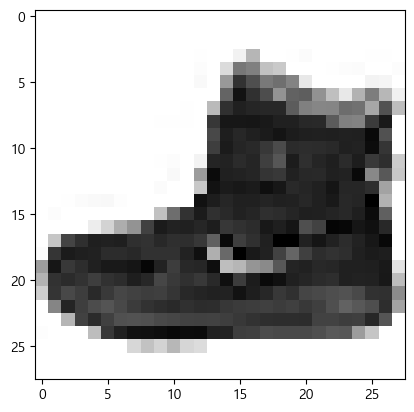

In [9]:
# train_input[0] 확인
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [10]:
# train_input[0] 데이터를 위 model을 가지고 예측
# 2차원행렬 -> 3차원 행렬 변경 / 255
inputs = train_input[0:1].reshape(-1,28,28,1)

# 1개를 예측, 임시 model(conv_acti)에서 predict
feature_maps = conv_acti.predict(inputs) # conv2D 모델만 존재

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [13]:
# 32개 필터의 활성화 맵이 구성됨
print(feature_maps.shape)

(1, 28, 28, 32)


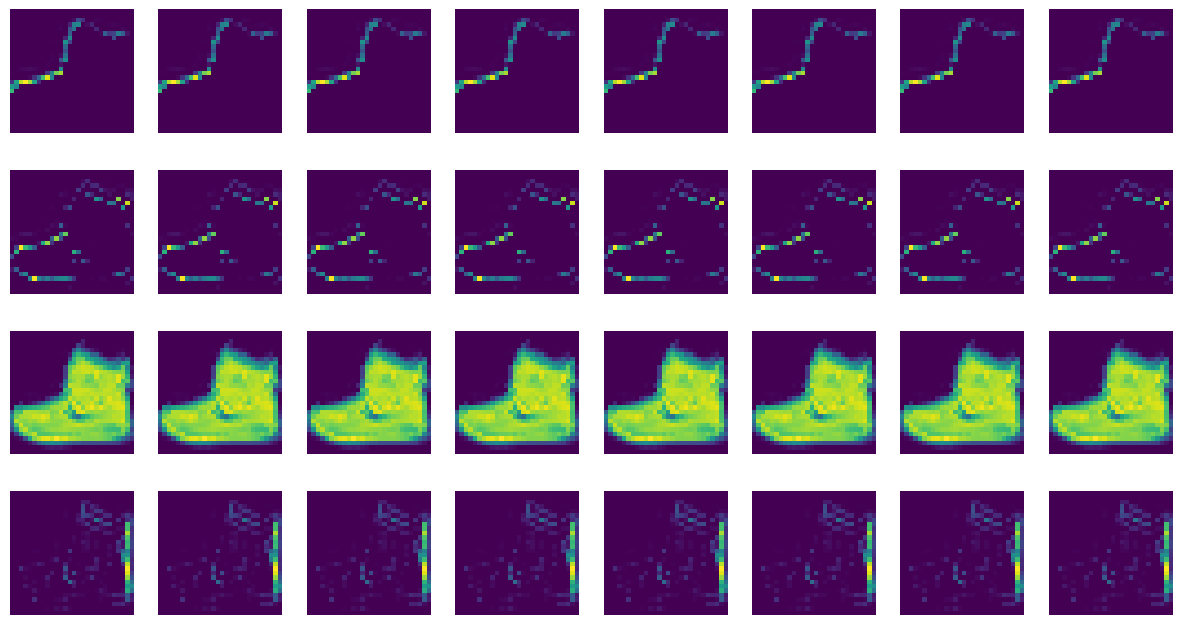

In [15]:
# 그래프 출력 - 활성화 맵(가중치 결과) 32장의 이미지 출력
fig,axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        # [0,0],[0,1]....[1,0],[1,7]...
        axs[i,j].imshow(feature_maps[0,:,:,i*4+8]) # 0,1,2,3...
        axs[i,j].axis('off')
plt.show()

In [8]:
model.layers

[<Conv2D name=conv2d_11, built=True>,
 <MaxPooling2D name=max_pooling2d_11, built=True>,
 <Conv2D name=conv2d_12, built=True>,
 <MaxPooling2D name=max_pooling2d_12, built=True>,
 <Flatten name=flatten_6, built=True>,
 <Dense name=dense_12, built=True>,
 <Dropout name=dropout_6, built=True>,
 <Dense name=dense_13, built=True>]